<a href="https://colab.research.google.com/github/moushumipriya/Machine-Learning-Projects/blob/main/EDA_short.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df=pd.read_csv('data.csv')

In [58]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [59]:
#EDA  univariant

In [60]:
df['Age'].describe()

count    383.000000
mean      40.866841
std       15.134494
min       15.000000
25%       29.000000
50%       37.000000
75%       51.000000
max       82.000000
Name: Age, dtype: float64

In [61]:
df['Gender'].value_counts()

Gender
F    312
M     71
Name: count, dtype: int64

In [62]:
df.shape

(383, 17)

In [63]:
df.isnull().sum()

#there is no null value in this dataset ,so we dont have to fiill in the value
#if we have those we will use handling null value method

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [64]:
#tranform categorical to Numerical data-one hot  encoding (for limited categorical data only
from sklearn.preprocessing import OneHotEncoder
ohc=OneHotEncoder()
ar=ohc.fit_transform(df[['Gender']]).toarray()
pd.DataFrame(ar,columns=['Male','Female'])




,Male,Female
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
378,0.0,1.0
379,0.0,1.0
380,0.0,1.0
381,0.0,1.0


In [ ]:
#to reduce the amount of excess colums we will use dropfirst method (drop the first columns)




In [68]:
#Label Encoding (perform on nominal data)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Gender'].value_counts()

Gender
0    312
1     71
Name: count, dtype: int64

In [72]:
#OUTLIER (exceptional  value in dataset)

df.describe()




,Age,Gender
count,383.000000,383.000000
mean,40.866841,0.185379
std,15.134494,0.389113
min,15.000000,0.000000
25%,29.000000,0.000000
50%,37.000000,0.000000
75%,51.000000,0.000000
max,82.000000,1.000000


<Axes: ylabel='Age'>

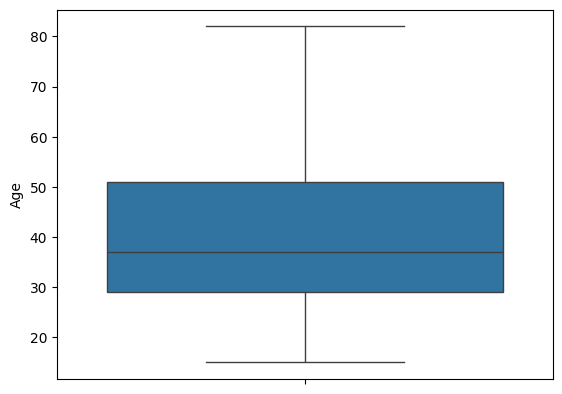

In [80]:
sns.boxplot(df['Age'])

<ipython-input-81-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

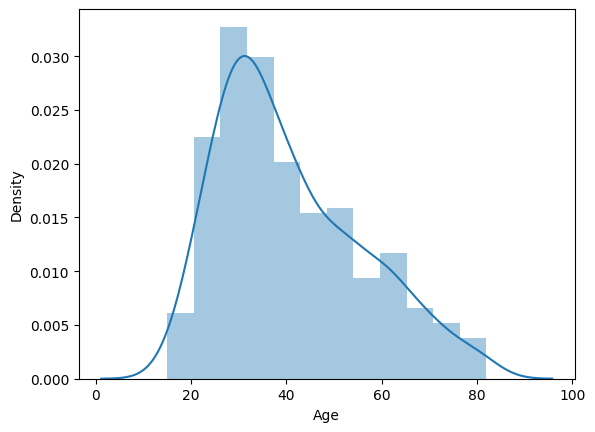

In [81]:
sns.distplot(df['Age'])

In [86]:
#outlier is not prsent .
#for right skewed /left skewd will use  IQR
#for normally distributed will use Z score

#removing outlier using 2 method (1.IQR, and 2.Z score)
#IQR (percentile)


percentile25=df['Age'].quantile(0.25)
percentile75=df['Age'].quantile(0.75)
iqr=percentile75-percentile25
print(iqr)
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr
print(upper_limit)
print(lower_limit)



22.0
84.0
-4.0


In [90]:
data=df[(df['Age']>lower_limit)&(df['Age']<upper_limit)]

In [91]:
data.shape

(383, 17)

<Axes: ylabel='Age'>

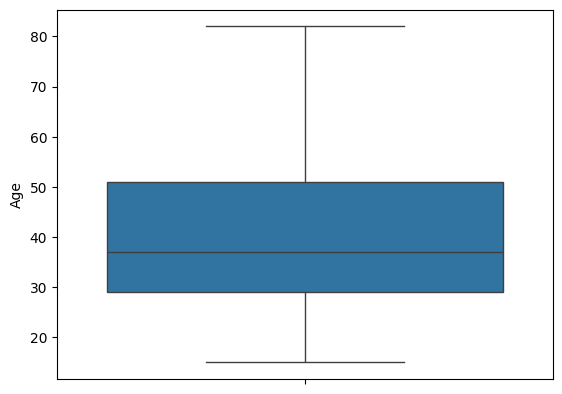

In [92]:
sns.boxplot(data['Age'])


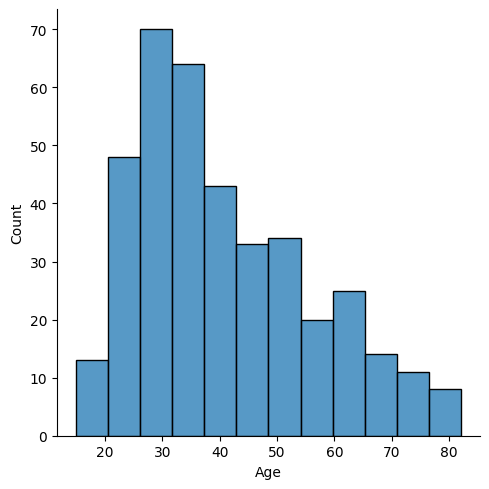

In [93]:
sns.displot(data['Age'])

In [ ]:
#FEATURE SCALING

#1.standaraiation
#2.nomalization
(to be done according to data pattern)














